<a href="https://colab.research.google.com/github/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/blob/main/Spaceship_Titanic_Challenge_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

In [ ]:
#Load data from GitHub

train_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/train.csv'
test_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/test.csv'

train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [ ]:
#Print first few rows

train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**EDA**

In [ ]:
#Overview of dataset

print("Dataset info")
train.info()

print("\n Descriptiv statistics")
display(train.describe(include = 'all'))

print("\n Missing valuse")
train.isnull().sum()

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

 Descriptiv statistics


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN



 Missing valuse


,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


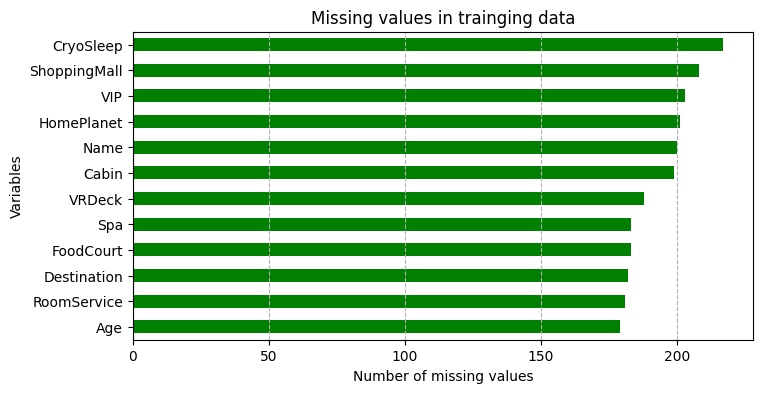

In [ ]:
#Visualize the missing values

missing_values = missing_values[missing_values > 0].sort_values(ascending = True)

plt.figure(figsize=(8, 4))
missing_values.plot(kind = 'barh', color ='green')
plt.title("Missing values in trainging data")
plt.xlabel("Number of missing values")
plt.ylabel("Variables")
plt.grid(axis = 'x', linestyle = '--')
plt.show()


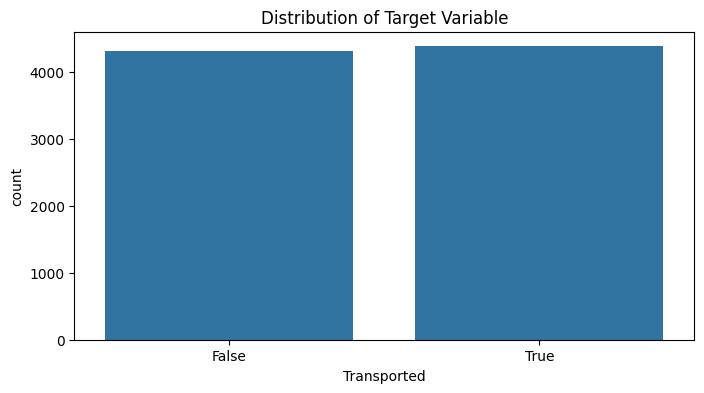

In [ ]:
#Target variable distribution

plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train)
plt.title("Distribution of Target Variable")
plt.show()

/tmp/ipython-input-34-3258163394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


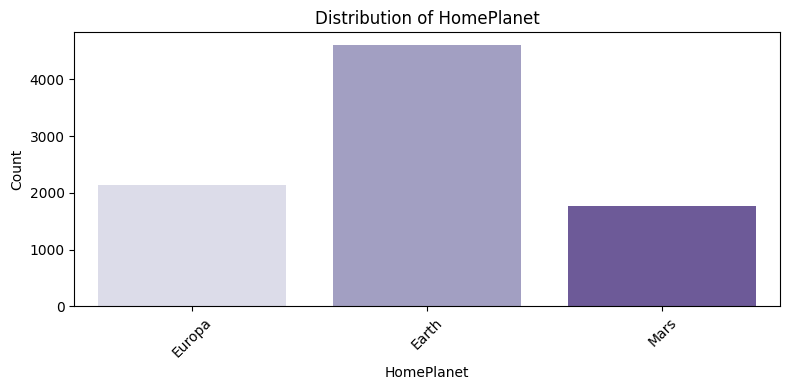

/tmp/ipython-input-34-3258163394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


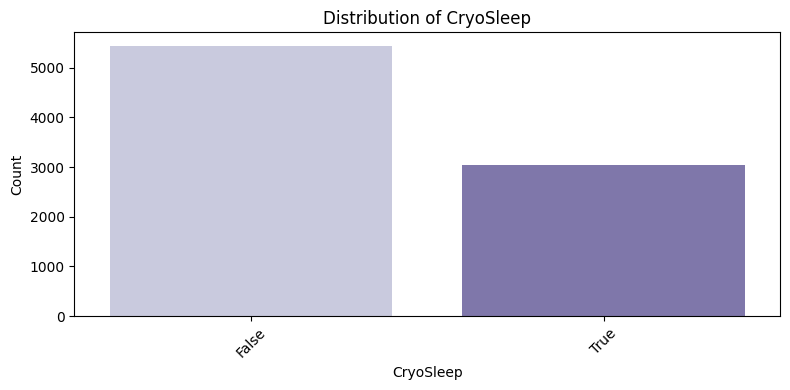

/tmp/ipython-input-34-3258163394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


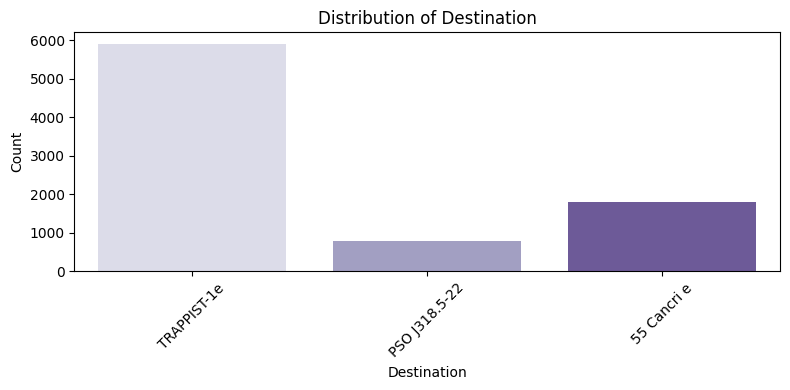

/tmp/ipython-input-34-3258163394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


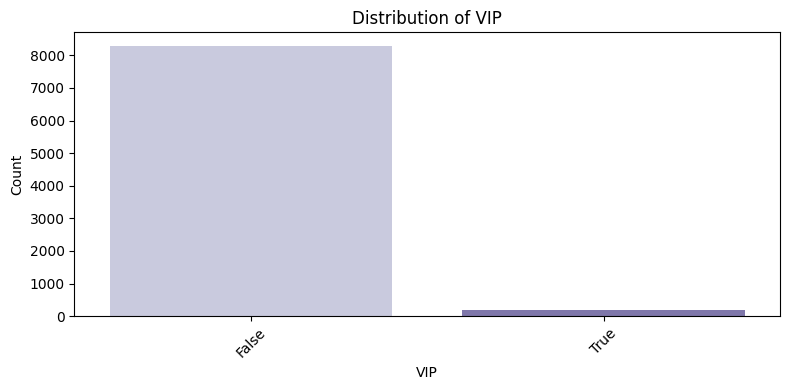

In [ ]:
#Distribution of categorical variables "HomePlanet, CryoSleep, Destination, VIP'"

categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for variable in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=train, palette='Purples')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

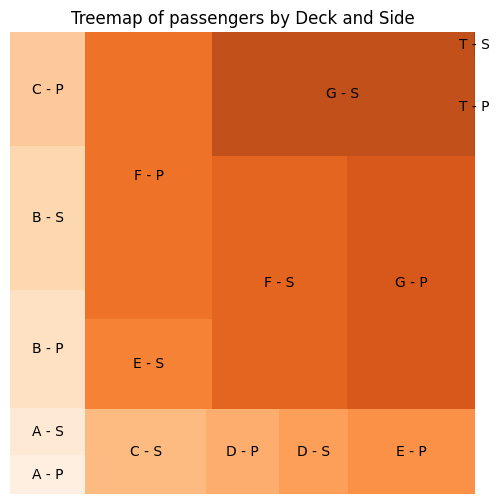

In [ ]:
#Split the cabin column
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)

#Group data by deck and dide
deck_side_counts = train.groupby(['Deck', 'Side']).size().reset_index(name='Count')

#Create a labels
deck_side_counts['Label'] = deck_side_counts['Deck'] + ' - ' + deck_side_counts['Side']

#Plot the Treemap
plt.figure(figsize=(6, 6))
squarify.plot(
    sizes=deck_side_counts['Count'],
    label=deck_side_counts['Label'],
    color=sns.color_palette('Oranges', len(deck_side_counts)),
    alpha=0.9
)
plt.title("Treemap of passengers by Deck and Side", fontsize=12)
plt.axis('off')
plt.show()

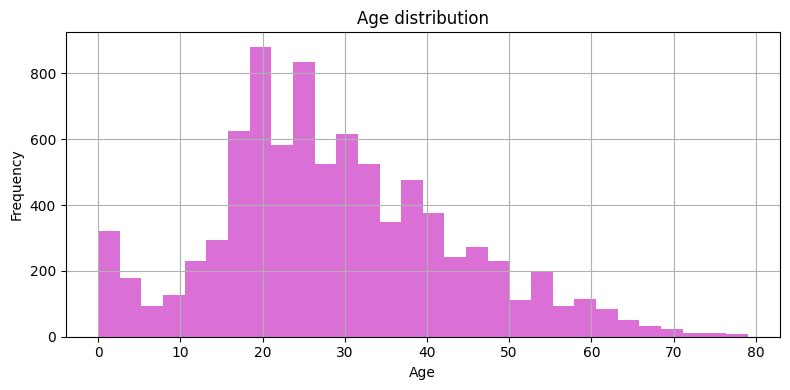

In [ ]:
#Distribution of categorical variables

num_col = ['Age']
ax = train[num_col].hist(bins=30, figsize=(8,4), color='orchid')[0][0]
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Age distribution")
plt.tight_layout()
plt.show()

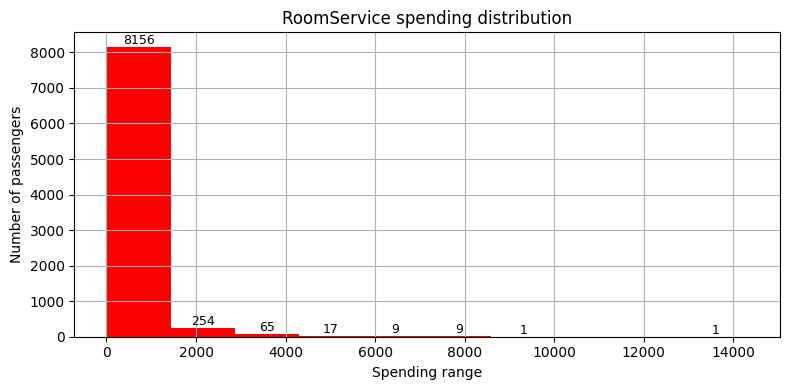

In [ ]:
num_col = ['RoomService']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='red')[0][0]

ax.set_xlabel("Spending range")
ax.set_ylabel("Number of passengers")
ax.set_title("RoomService spending distribution")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

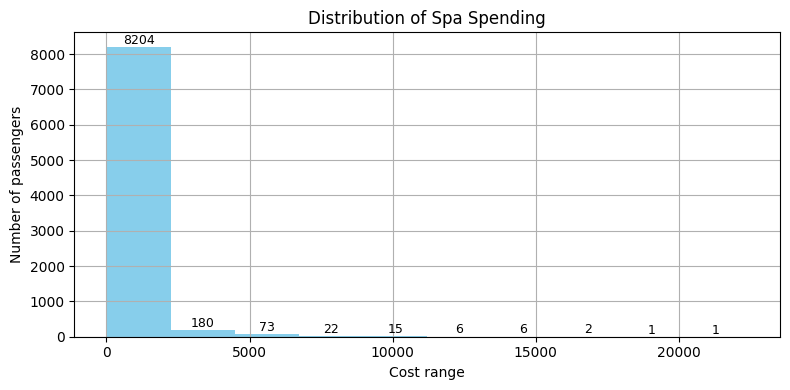

In [ ]:
num_col = ['Spa']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='skyblue')[0][0]

ax.set_xlabel("Cost range")
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of Spa Spending")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

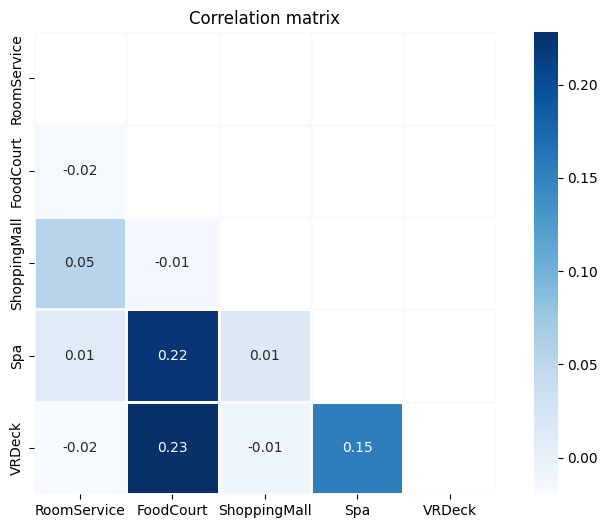

In [ ]:
#Numerical columns relevant for correlation
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#Compute correlation matrix for these columns only
corr_matrix = train[num_cols].corr()

#Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='Blues',
    linewidths=1,
    square=True,
    linecolor='#fafafa',
    annot=True,
    fmt=".2f")

plt.title('Correlation matrix', fontsize=12)
plt.show()

**Pre Processing**

In [ ]:
#Fill numerical with mean

numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = train[col].fillna(train[col].mean())

In [ ]:
#Fill 'Name' with 'Unknown'

train['Name'] = train['Name'].fillna('Unknown')
test['Name'] = test['Name'].fillna('Unknown')

In [ ]:
#Fill categorical missing value with mode
#for col in categorical_cols:
#    train[col].fillna(train[col].mode()[0], inplace=True)
#    test[col].fillna(test[col].mode()[0], inplace=True)

In [ ]:
print("\n Missing valuse")
train.isnull().sum()


 Missing valuse


,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,0
FoodCourt,0
ShoppingMall,0
